In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## Data preparation

In [2]:
df = pd.read_csv('./US_Accidents_March23.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [6]:
df.tail(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df[['State']]

,State
0,OH
1,OH
2,OH
3,OH
4,OH
...,...
7728389,CA
7728390,CA
7728391,CA
7728392,CA


In [8]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [10]:
# Selecting numeric data types
numeric_df = df.select_dtypes(include=np.number)
len(numeric_df.columns)

13

In [11]:
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

<Axes: >

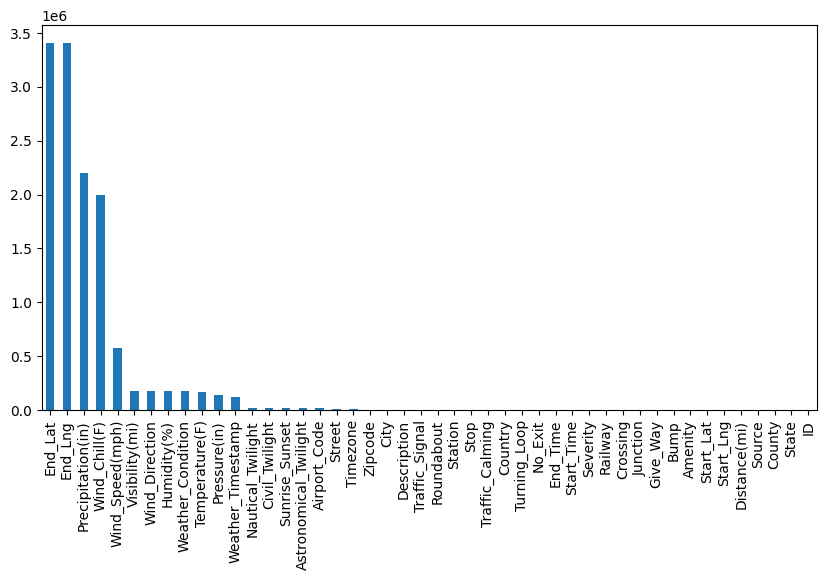

In [12]:
plt.figure(figsize=(10,5))
missing_values.plot.bar()

<Axes: >

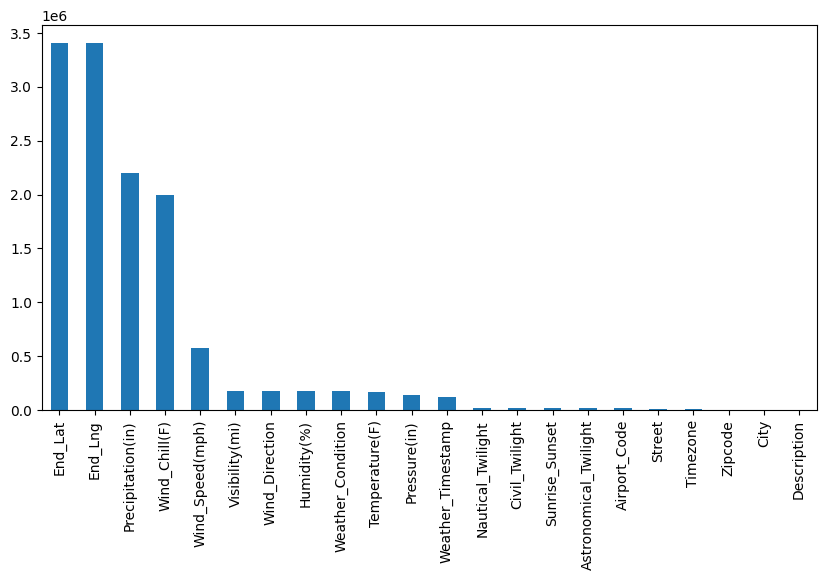

In [13]:
plt.figure(figsize=(10,5))
missing_values[missing_values != 0].plot.bar()

In [13]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

## EDA (Exploratory Data Analysis) and Visualization

### Some Questions that can be asked
1. Top 10 cities with most accidents 
2. Top 10 streets with accidents
3. Average accidents in US
4. Time
5. Start lat,lng
6. Temperature
7. Weather Conditions

In [14]:
cities = df['City'].unique()
len(cities)

13679

In [15]:
cities_with_accidents = df['City'].value_counts().sort_values(ascending=False)
cities_with_accidents

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

<AxesSubplot:>

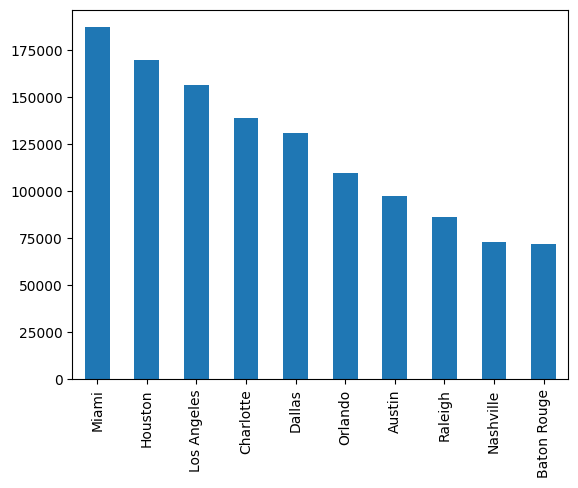

In [16]:
cities_with_accidents[:10].plot(kind='bar')

<details open>
<summary>Resources for below code</summary>

1. [seaborn palete](https://seaborn.pydata.org/tutorial/color_palettes.html)
</details>

In [17]:
pd.DataFrame(df['City'].value_counts()).reset_index()

,index,City
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Benkelman,1
13674,Old Appleton,1
13675,Wildrose,1
13676,Mc Nabb,1


In [18]:
city_wise = pd.DataFrame(df['City'].value_counts().sort_values(ascending=False)).reset_index().rename(columns={'index':'City','City':'Cases'})
city_wise

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Bon Secour,1
13674,Sidney Center,1
13675,Fluker,1
13676,Mapleville,1


In [19]:
top_10_cities = city_wise[:10]
top_10_cities

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


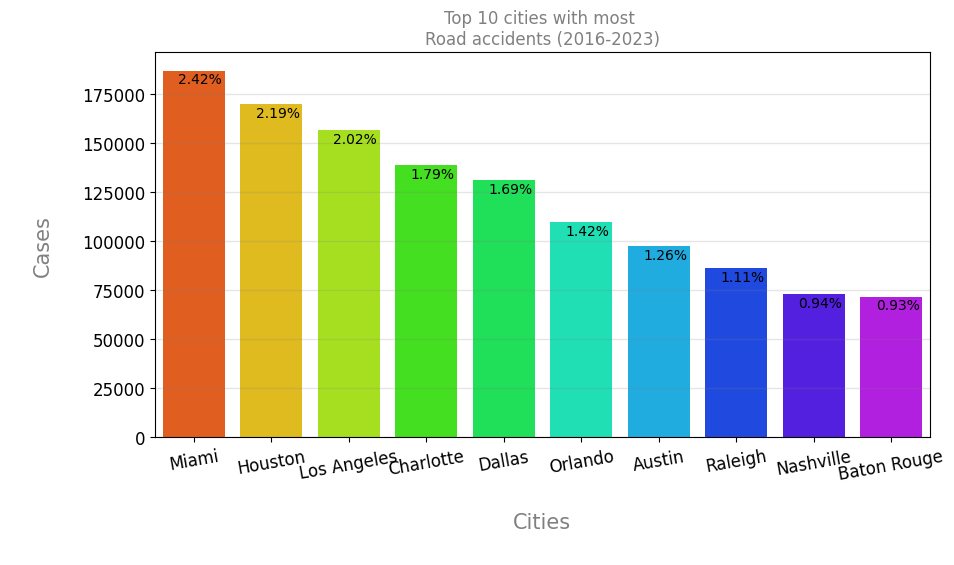

In [20]:
# Let us try more beautiful bar plot

fig, ax = plt.subplots(figsize = (10,5))
ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='gist_rainbow')
total = sum(city_wise['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+0.2,i.get_height()-6500,str(round(i.get_height()/total*100,2))+'%')

# title, ticks and labels
plt.title('Top 10 cities with most \nRoad accidents (2016-2023)',color='grey')
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nCases\n', fontsize=15, color='grey')

ax.grid(color='grey', linewidth=1, axis='y', alpha=.2)

plt.show()

In [21]:
df['City'][df['Start_Time']==pd.to_datetime('2016-02-08')]

Series([], Name: City, dtype: object)

In [22]:
import pandas as pd

# Assuming df is your DataFrame and 'City' and 'Start_Time' are the relevant columns
miami_accidents_2021 = df[(df['City'] == 'Miami') & (df['Start_Time'].dt.year == 2021)]
num_accidents_2021 = len(miami_accidents_2021)

print("Number of accidents in Miami city for the year 2021:", num_accidents_2021)


Number of accidents in Miami city for the year 2021: 58845


In [23]:
miami_accidents_2021 = len(df[(df['City'] == 'Miami') & (df['Start_Time'].dt.year == 2021)])
print(f"Accidents in miami in year 2021: {miami_accidents_2021}")

Accidents in miami in year 2021: 58845


In [24]:
miami_accidents_2023 = len(df[(df['City'] == 'Miami') & (df['Start_Time'].dt.year == 2023)])
print(f"Accidents in miami in year 2023: {miami_accidents_2023}")

Accidents in miami in year 2023: 5238


In [25]:
'New York' in df['City'].values

True

In [26]:
len(df[df['City'] == 'Miami']), len(df[df['City'] == 'New York'])

(186917, 21699)

In [27]:
df[df['City'] == 'New York']['Start_Time'].min()

Timestamp('2016-03-24 09:56:12')

In [28]:
city_wise.head(2)

,City,Cases
0,Miami,186917
1,Houston,169609


In [29]:
def city_percent_cases(val):
    low_accidental_cities = city_wise[city_wise['Cases'] < val].shape[0]
    high_accidental_cities = city_wise[city_wise['Cases'] >= val].shape[0]

    print(f'{low_accidental_cities} and {high_accidental_cities}, less than {round(high_accidental_cities/city_wise.shape[0],2)}%'
           f'of cities has less than {val} num of accidents')

In [30]:
city_percent_cases(1000)

12460 and 1218, less than 0.09%of cities has less than 1000 num of accidents


### count of cases in cities

<AxesSubplot:ylabel='Count'>

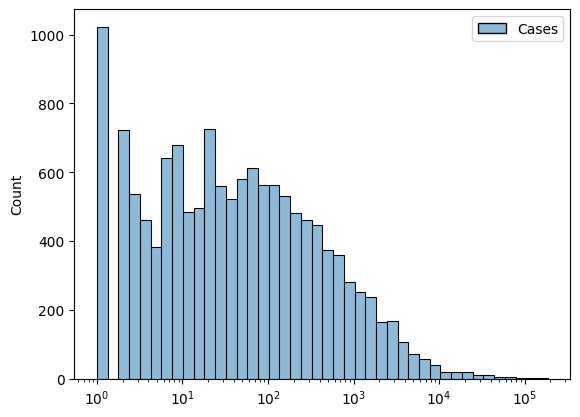

In [31]:
sns.histplot(city_wise, log_scale=True)

In [32]:
city_wise[city_wise['Cases'] == 1]

,City,Cases
12655,Adolphus,1
12656,Laclede,1
12657,Lathrup Village,1
12658,Morris Run,1
12659,Casstown,1
...,...,...
13673,Bon Secour,1
13674,Sidney Center,1
13675,Fluker,1
13676,Mapleville,1


In [33]:
len(city_wise[city_wise['Cases'] == 1])

1023

## Time of most accidents

In [34]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

<AxesSubplot:xlabel='Hours', ylabel='Cases'>

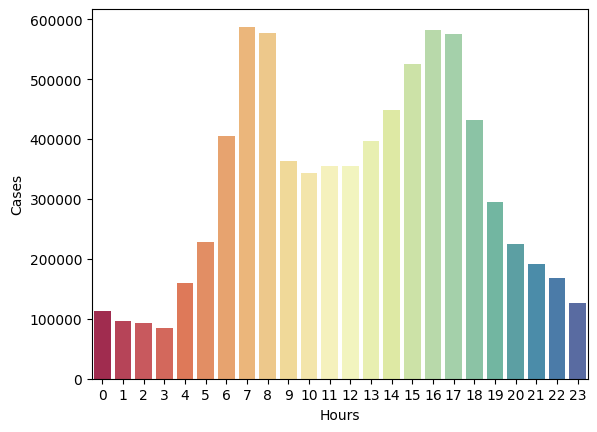

In [35]:
sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'],palette='Spectral')

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
sns.set_style("darkgrid")

In [38]:
day_by = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day','Start_Time':'Cases'})

<AxesSubplot:xlabel='Day', ylabel='Cases'>

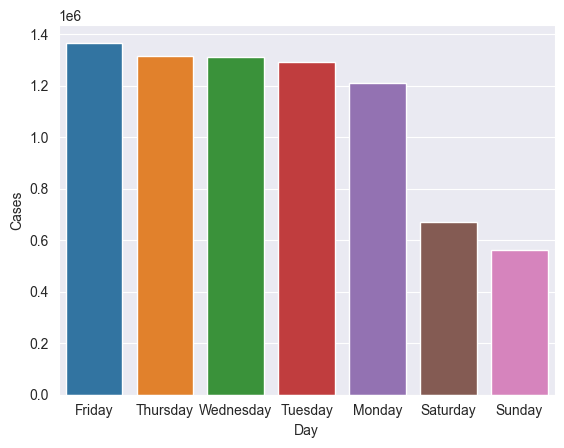

In [39]:
sns.barplot(y=day_by['Cases'],x=day_by['Day'])

## Temperature

In [40]:
df['Temperature(F)']

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Temperature(F), Length: 7728394, dtype: float64

In [41]:
weather_wise = pd.DataFrame(df['Temperature(F)'].value_counts()).reset_index().rename(columns={'index':'Temperature(F)','Temperature(F)':'Cases'})
weather_wise

,Temperature(F),Cases
0,77.0,170991
1,73.0,170898
2,68.0,163767
3,72.0,160498
4,75.0,158448
...,...,...
855,1.6,1
856,-21.5,1
857,127.0,1
858,158.0,1


In [61]:
min_value = min(df['Temperature(F)'])
intervals = [int(min_value)]
intervals

[-89]

In [62]:
gap = 30
labels = []
for i in range(1,10):
    lower_limit = int(min_value+(i-1)*gap)
    upper_limit = int(min_value+(i)*gap)
    intervals.append(upper_limit)

    label_var = f'({lower_limit} to {upper_limit})'
    labels.append(label_var)    

In [63]:
intervals

[-89, -59, -29, 1, 31, 61, 91, 121, 151, 181]

In [68]:
new_df = pd.DataFrame()
new_df['Grouped Temp'] = pd.cut(df['Temperature(F)'],bins=intervals,labels=labels)
new_df

,Grouped Temp
0,(31 to 61)
1,(31 to 61)
2,(31 to 61)
3,(31 to 61)
4,(31 to 61)
...,...
7728389,(61 to 91)
7728390,(61 to 91)
7728391,(61 to 91)
7728392,(61 to 91)


In [69]:
temp_df = pd.DataFrame(new_df['Grouped Temp'].value_counts()).reset_index()
temp_df

,index,Grouped Temp
0,(61 to 91),3907749
1,(31 to 61),2906028
2,(1 to 31),516458
3,(91 to 121),208948
4,(-29 to 1),25122
5,(-59 to -29),154
6,(121 to 151),40
7,(-89 to -59),11
8,(151 to 181),11


In [70]:
temp_df = pd.DataFrame(new_df['Grouped Temp'].value_counts()).reset_index().rename(columns={'index':'Bins','Grouped Temp':'Cases'})
temp_df

,Bins,Cases
0,(61 to 91),3907749
1,(31 to 61),2906028
2,(1 to 31),516458
3,(91 to 121),208948
4,(-29 to 1),25122
5,(-59 to -29),154
6,(121 to 151),40
7,(-89 to -59),11
8,(151 to 181),11


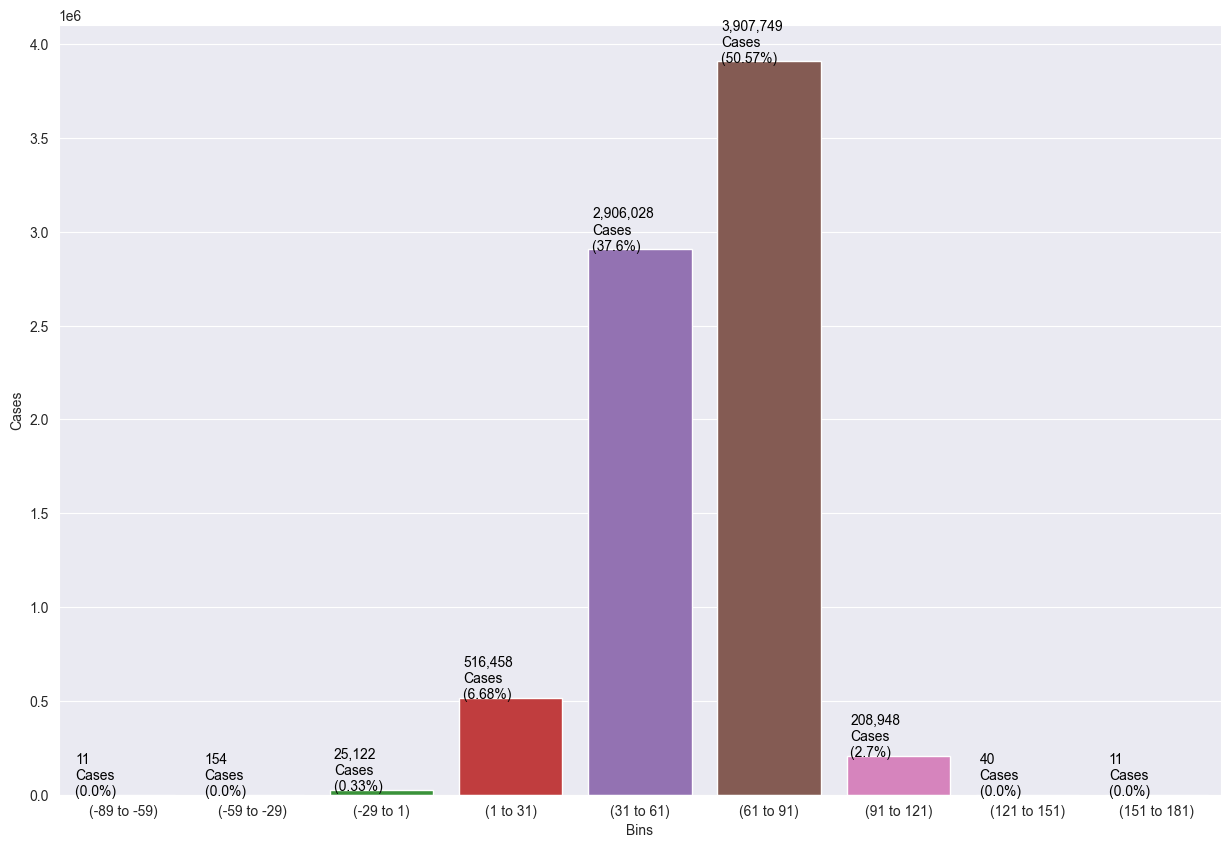

In [78]:
plt.figure(figsize=(15,10))
ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'])
for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()-5000, \
        '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)),
            color='black')